In [1]:
import cv2
import numpy as np
import skimage.data
import scipy.signal
import scipy.ndimage
import matplotlib.pyplot as plt

In [2]:
image = skimage.data.astronaut()
image = image[..., 0]

image_type = float
kernel_type = float
print(image.dtype)

uint8


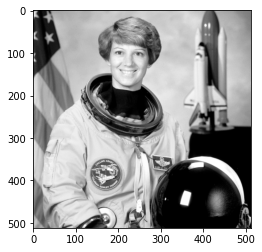

In [3]:
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
kernel = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

In [14]:
image = np.ones((12, 12))

In [125]:
h_i, w_i = image.shape[:2]
h_k, w_k = kernel.shape[:2]

h_pad, w_pad = (h_i - (h_k // 2 - 2)), (w_i - (w_k // 2 - 2))
h_pad_i, w_pad_i = h_k // 2 + 1, w_k // 2 + 1

kernel_pad = np.pad(kernel, pad_width=((0, h_pad), (0, w_pad)), mode='constant', constant_values=0)
image_pad = np.pad(image, pad_width=((w_pad_i, h_pad_i), (h_pad_i, w_pad_i)), mode='constant', constant_values=0)

print(image_pad.shape, kernel_pad.shape)

(16, 16) (16, 16)


In [126]:
image_pad, kernel_pad

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1

In [127]:
fft_img = np.fft.fft2(image_pad)
fft_ker = np.fft.fft2(kernel_pad)
fft_conv = fft_img * fft_ker
conv = np.fft.ifft2(fft_conv)
conv = np.real(conv)[h_pad_i:-h_pad_i, w_pad_i:-w_pad_i]

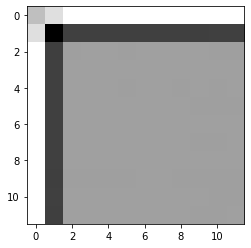

In [128]:
plt.imshow(conv, cmap='gray')

In [104]:
conv

array([[-5.00000000e+00, -3.00000000e+00, -3.00000000e+00,
        -3.00000000e+00, -3.00000000e+00, -3.00000000e+00,
        -3.00000000e+00, -3.00000000e+00, -3.00000000e+00,
        -3.00000000e+00, -3.00000000e+00],
       [-3.00000000e+00,  1.82678942e-15,  8.48554537e-16,
         9.16311613e-16,  3.96925550e-16,  6.42024329e-16,
         2.21829818e-16,  4.45989573e-16,  1.27604290e-15,
         6.58891196e-16,  1.46278310e-15],
       [-3.00000000e+00,  6.17752510e-16,  3.04321108e-16,
        -8.03906944e-17, -8.40138295e-16, -8.52201915e-17,
        -6.19202207e-16, -1.05939543e-15,  2.18488119e-17,
         1.58567590e-16,  5.23809436e-17],
       [-3.00000000e+00,  1.55352021e-15, -1.23327466e-17,
         2.84147405e-16,  7.18850553e-16,  3.37305525e-16,
        -8.09294128e-17,  6.43759223e-16,  8.28611005e-16,
        -2.59880501e-16,  1.11757918e-15],
       [-3.00000000e+00,  7.62939573e-16,  7.24202146e-16,
         1.77921205e-16,  1.08864780e-16,  7.15395348e-16,
  

In [99]:
conv[conv < 1e-2] = 0
conv

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

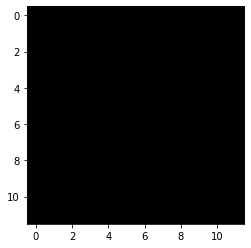

In [100]:
conv_cv2 =  cv2.filter2D(image, -1, kernel)
plt.imshow(conv_cv2, cmap='gray')

In [79]:
conv_cv2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [208]:
def my_dummy_conv(image, kernel):
    h_i, w_i = image.shape[:2]
    h_k, w_k = kernel.shape[:2]

    h_pad, w_pad = (h_i - (h_k // 2 + 1)), (w_i - (w_k // 2 + 1))
    h_pad_i, w_pad_i = h_k // 2, w_k // 2
    
    kernel_pad = np.pad(kernel, pad_width=((0, h_pad), (0, w_pad)), mode='constant', constant_values=0)
    image_pad = np.pad(image, pad_width=((0, h_pad_i), (0, w_pad_i)), mode='constant', constant_values=0)
    
    fft_img = np.fft.fft2(image_pad)
    fft_ker = np.fft.fft2(kernel_pad)
    fft_conv = fft_img * fft_ker
    conv = np.fft.ifft2(fft_conv)
    conv = np.real(conv)[:-h_pad_i, :-w_pad_i]
    
    return conv

11.8 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


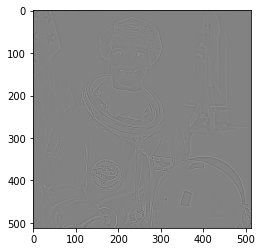

In [217]:
%timeit conv = my_dummy_conv(image, kernel)

conv_d = my_dummy_conv(image.astype(image_type), kernel.astype(kernel_type))
plt.imshow(conv_d, cmap='gray')

351 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


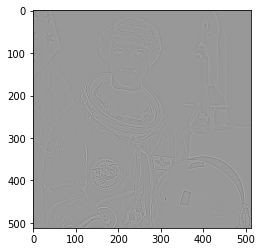

In [216]:
%timeit conv = cv2.filter2D(image, -1, kernel)

conv_cv2 =  cv2.filter2D(image.astype(image_type), -1, kernel.astype(kernel_type))
plt.imshow(conv_cv2, cmap='gray')

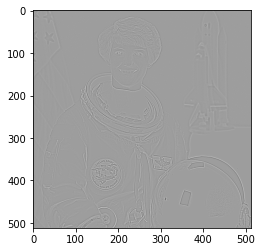

In [211]:
# %timeit conv = scipy.signal.convolve2d(image, kernel, boundary='symm', mode='same')

conv_sc = scipy.signal.convolve2d(image.astype(image_type), kernel.astype(kernel_type), boundary='symm', mode='same')
plt.imshow(conv_sc, cmap='gray')

In [218]:
def np_fftconvolve(A, B):
    return np.abs(np.fft.ifft2(np.fft.fft2(A) * np.fft.fft2(B, s=A.shape)))

def np_fftconvolve_(A, B):
    return np.real(np.fft.ifft2(np.fft.fft2(A) * np.fft.fft2(B, s=A.shape)))

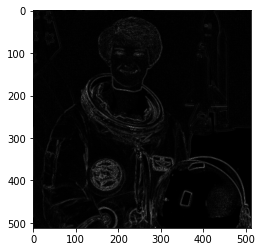

In [219]:
conv_np = np_fftconvolve(image.astype(image_type), kernel.astype(kernel_type))
plt.imshow(conv_np, cmap='gray')

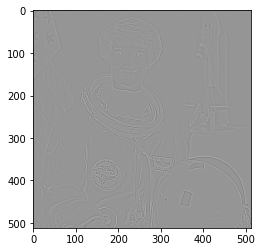

In [220]:
# %timeit conv = np_fftconvolve(image, kernel)

conv_np_ = np_fftconvolve_(image.astype(image_type), kernel.astype(kernel_type))
plt.imshow(conv_np_, cmap='gray')

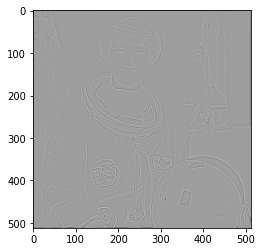

In [221]:
# %timeit scipy.ndimage.convolve(image, kernel, mode='constant')

conv_scnd = scipy.ndimage.convolve(image.astype(image_type), kernel.astype(kernel_type), mode='constant')
plt.imshow(conv_scnd, cmap='gray')